# Multiple Linear Regressison

### Use Cases : 
1. To determine the strength of independent variable over dependant variable
2. Predicting the impact of changes

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

In [2]:
path='https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/FuelConsumptionCo2.csv' #Data for study

In [3]:
#Reading the data
path = 'FuelConsumption.csv'
df = pd.read_csv(path)
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [4]:
cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
cdf.head(9)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,9.9,6.7,8.5,196
1,2.4,4,11.2,7.7,9.6,221
2,1.5,4,6.0,5.8,5.9,136
3,3.5,6,12.7,9.1,11.1,255
4,3.5,6,12.1,8.7,10.6,244
5,3.5,6,11.9,7.7,10.0,230
6,3.5,6,11.8,8.1,10.1,232
7,3.7,6,12.8,9.0,11.1,255
8,3.7,6,13.4,9.5,11.6,267


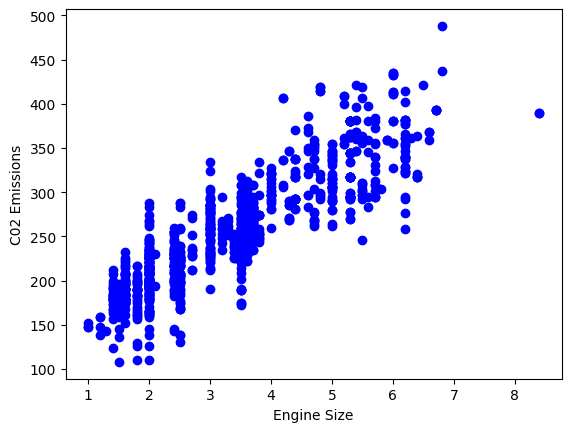

In [5]:
plt.scatter(cdf.ENGINESIZE,cdf.CO2EMISSIONS,c='blue')
plt.xlabel('Engine Size')
plt.ylabel('C02 Emissions')
plt.show()

In [7]:
#Now Create Train Test datasets using random selection
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]
# print(train, test)

## Now that the train and test data are ready we need a model to implement the multiple regression

In [8]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
x = np.asanyarray(train[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])
y = np.asanyarray(train[['CO2EMISSIONS']])
regr.fit(x,y)
print("Coefficients : ", regr.coef_)

Coefficients :  [[11.57286111  7.60021135  9.48137433]]


In [10]:
#Now that the model is trained we need to do the prediction:
y_hat = regr.predict(test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']]) #Calling it y hat instead of prediction makes it mathematically easier to interpret
#brings in the test data
x = np.asanyarray(test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])
y = np.asanyarray(test[['CO2EMISSIONS']])

print("Residual Sum of squares :  ", np.mean((y_hat-y)**2))
print('The Variance is : ',regr.score(x,y)) #If variance score is 1 then the prediction is perfect

Residual Sum of squares :   539.3690827707709
The Variance is :  0.8476376646714601


/home/gh0st/myRepos/AIML-Coursea-IBM/venv/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


### Assignment : Test a Multiple Linear Regression Model on FUELCONSUMPTION_CITY and FUELCONSUMPTION_HWY instead of FUELCONSUMPTION_COMB

In [11]:
regression_model = linear_model.LinearRegression() #Creating another model just in case
x = np.asanyarray(train[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY']])
y = np.asanyarray(train[['CO2EMISSIONS']])
regression_model.fit(X=x,y=y)
print('Coefficient : ',regression_model.coef_)

Coefficient :  [[11.62027547  7.36283432  5.82107749  3.46256954]]


In [15]:
prediction = regression_model.predict(test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY']])
x = np.asanyarray(test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY']])
y = np.asanyarray(test[['CO2EMISSIONS']])
print("Residual sum of squares: ", np.mean((prediction - y) ** 2))
print('Variance score: ', regression_model.score(x, y))

Residual sum of squares:  538.2070469358184
Variance score:  0.8479659194773145


/home/gh0st/myRepos/AIML-Coursea-IBM/venv/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(
